# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
# from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dallasgold/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [1]:
# Read your api key environment variable
# load_dotenv();
# api_key = os.getenv("NEWS_API")
api_key = 'c8d0b069f4584a808df421f2d2d744b3'

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
def fetch_news(crypto):
    news = newsapi.get_everything(q=crypto, language="en")["articles"]
    return news

In [5]:
# Fetch the Bitcoin news articles
btc_news = fetch_news("Bitcoin")

In [6]:
# Fetch the Ethereum news articles
eth_news = fetch_news("Ethereum")

In [7]:
def find_sentiment(news):
    sentiment_list = []
    for article in news:
        sentiment = analyzer.polarity_scores(article["content"])
            
        # Append the sentiment scores to the list
        sentiment_list.append({
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Neutral": sentiment["neu"],
            "Negative": sentiment["neg"],
            "Text": article["content"]
        })        

    return pd.DataFrame(sentiment_list)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_scores = find_sentiment(btc_news)

In [12]:
type(btc_sentiment_scores)

pandas.core.frame.DataFrame

In [13]:
btc_sentiment_scores.sample()

,Compound,Positive,Neutral,Negative,Text
15,0.0,0.0,1.0,0.0,Bitcoin was trading over 7% higher on Monday m...


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_scores = find_sentiment(eth_news)

In [10]:
# Describe the Bitcoin Sentiment
btc_sentiment_scores.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.00000,20.000000
mean,0.195090,0.048400,0.94845,0.003150
std,0.288628,0.064743,0.06379,0.014087
min,-0.273200,0.000000,0.80100,0.000000
25%,0.000000,0.000000,0.89650,0.000000
50%,0.000000,0.000000,1.00000,0.000000
75%,0.481000,0.103500,1.00000,0.000000
max,0.755800,0.199000,1.00000,0.063000


In [11]:
# Describe the Ethereum Sentiment
eth_sentiment_scores.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.285405,0.062800,0.934800,0.002400
std,0.313684,0.074233,0.077756,0.010733
min,0.000000,0.000000,0.779000,0.000000
25%,0.000000,0.000000,0.902500,0.000000
50%,0.180600,0.036000,0.964000,0.000000
75%,0.530600,0.097500,1.000000,0.000000
max,0.822500,0.221000,1.000000,0.048000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ether, at .62

Q: Which coin had the highest compound score?

A: Ether at .822

Q. Which coin had the highest positive score?

A: Ether again at .22

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [133]:
from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import reuters, stopwords, wordnet
from string import punctuation
import re

In [157]:
from nltk.corpus import stopwords

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
stopwords.update({'see', 'illustration', 'picture', 'take', 'getty', 'images', 'kongoct',
                 '192021reuters/edgar'})

In [168]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    text = text.replace(']', ' ').replace(')', ' ').replace('(', ' ').replace('<', ' ')
      
    # Remove the punctuation from text
    no_punkt = re.compile('[^a-zA-Z] ').sub('',text)
    
    # Create a tokenized list of the words
    toked_list = word_tokenize(no_punkt)
    
    # Lemmatize words into root words
    lem_adj = [lemmatizer.lemmatize(word, wordnet.ADJ) for word in toked_list]
    lem_adv = [lemmatizer.lemmatize(word, wordnet.ADV) for word in lem_adj]
    lem_verbs = [lemmatizer.lemmatize(word, wordnet.VERB) for word in lem_adv]
    lem_nouns = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in lem_verbs]
    lem_words = [lemmatizer.lemmatize(word) for word in lem_nouns]
       
    # Remove the stop words    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem_words if word.lower() not in stopwords]
    
       
    return tokens

In [169]:
# Create a new tokens column for Bitcoin
btc_sentiment_scores['Tokens'] = [tokenizer(text) for text in btc_sentiment_scores['Text']]

In [170]:
# Create a new tokens column for Ethereum
eth_sentiment_scores['Tokens'] = [tokenizer(text) for text in eth_sentiment_scores['Text']]

In [171]:
eth_sentiment_scores.head()

,Compound,Positive,Neutral,Negative,Text,Tokens
0,0.0000,0.000,1.000,0.0,A new cross-chain bridge is currently connecte...,"[new, cross-chain, bridge, currently, connect,..."
1,0.0000,0.000,1.000,0.0,Mark Cuban has some advice for people who are ...,"[mark, cuban, advice, people, new, invest, cry..."
2,0.4588,0.094,0.906,0.0,Ethereum and bitcoin are the two biggest crypt...,"[ethereum, bitcoin, two, big, cryptocurrencies..."
3,0.5267,0.093,0.907,0.0,Elon Musk\r\npicture alliance / Getty Images\r...,"[elon, musk, alliance, cryptocurrency, name, e..."
4,0.4588,0.097,0.903,0.0,Cryptocurrency and business continuity line im...,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [172]:
from collections import Counter
from nltk import ngrams

In [173]:
def token_to_list(tokens):
    token_list = []
    for token in tokens:
        for t in token:
            token_list.append(t)
    return token_list

In [174]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = btc_sentiment_scores['Tokens']
btc_token_list = token_to_list(btc_tokens)

# for tokens in btc_tokens:
#     for token in tokens:
#         token_list.append(token)
# btc_ngram = Counter(ngrams(btc_tokens, n=2))


In [175]:
btc_ngram_count = Counter(ngrams(btc_token_list, n=2))

In [176]:
# Generate the Ethereum N-grams where N=2
eth_tokens = eth_sentiment_scores['Tokens']
eth_token_list = token_to_list(eth_tokens)
eth_ngram_count = Counter(ngrams(eth_token_list, n=2))

In [177]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [178]:
# Use token_count to get the top 10 words for Bitcoin
display(dict(btc_ngram_count.most_common(10)))

{('cryptocurrency', 'bitcoin'): 4,
 ('2', 'reutersbitcoin'): 3,
 ('representation', 'virtual'): 3,
 ('virtual', 'cryptocurrency'): 3,
 ('bitcoin', 'october'): 3,
 ('posted', 'bitcoin'): 2,
 ('exchange-traded', 'fund'): 2,
 ('hit', 'six-month'): 2,
 ('six-month', 'high'): 2,
 ('futures-based', 'etf'): 2}

In [144]:
# Use token_count to get the top 10 words for Ethereum
display(dict(eth_ngram_count.most_common(10)))

{('elon', 'musk'): 2,
 ('cryptocurrency', 'exchange'): 2,
 ('bitcoin', 'ethereum'): 2,
 ('rahul', 'rai'): 2,
 ('record', '$'): 2,
 ('new', 'cross-chain'): 1,
 ('cross-chain', 'bridge'): 1,
 ('bridge', 'currently'): 1,
 ('currently', 'connect'): 1,
 ('connect', 'ethereum'): 1}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [183]:
def display_word_cloud(string_list):
    str_convers = ' '.join(string_list)
    wc = WordCloud().generate(str_convers)
    plt.imshow(wc)

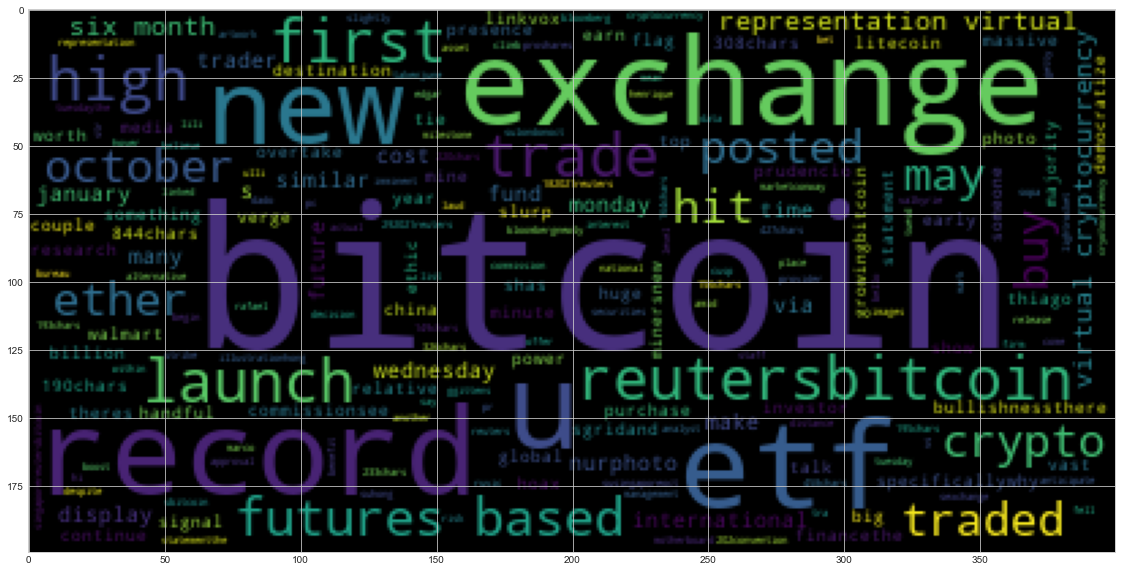

In [184]:
# Generate the Bitcoin word cloud
display_word_cloud(btc_token_list)

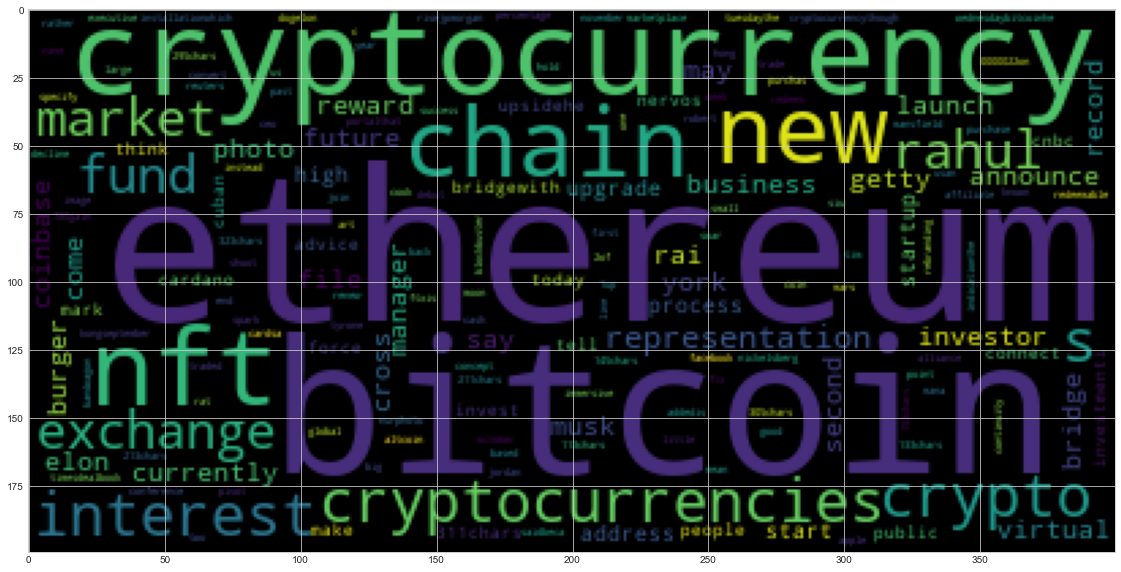

In [185]:
# Generate the Ethereum word cloud
display_word_cloud(eth_token_list)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [186]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [187]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [188]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_sentiment_scores.Text.values)

In [189]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data['title'] = 'BTC News Named Entity Recognition'

In [192]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [193]:
# List all Entities
[ent.text for ent in btc_ner.ents]

['earlier this year',
 'Verge',
 'Vox Media',
 'Thiago Prudencio/S',
 '$1.6 billion',
 'Wednesday',
 'a couple of minutes',
 'U.S.',
 'U.S.',
 'China',
 'Bitcoin',
 'Bloomberg',
 'the National Bureau',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationHONG KONG',
 'Oct 21',
 'Reuters',
 'October 19, 2021',
 'REUTERS',
 'Edgar SuLONDON',
 'Oct 20',
 'Reuters',
 'October 19, 2021',
 'REUTERS',
 'Edgar SuHONG KONG',
 'Oct 20',
 'Reuters',
 'Wednesday',
 'first',
 'U.S.',
 'Conway G. Gittens',
 'October 18, 2021',
 'REUTERS',
 'Edgar SuSINGAPORE',
 'Oct 19',
 'Reuters',
 'six-month',
 'Reuters',
 'Reuters',
 'six-month',
 'Tuesday',
 'U.S.',
 'NurPhoto',
 'Getty Images',
 'first',
 'Tuesday',
 'ProShares',
 '2021',
 'Marco Bello',
 'The Securities and Exchange Commission',
 'Valkyrie',
 'ETF',
 'NurPhoto',
 'ETF',
 '>Bloomberg',
 'first',
 'ETF',
 'Rafael Henrique',
 'Getty Images\r\n',
 '7%',
 'Monday',
 'morning',
 'around $66,105',
 '3%',
 '4,722',
 'over 9%',
 'Mexican',
 'Volaris

---

### Ethereum NER

In [194]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_sentiment_scores.Text.values)

In [195]:
# Run the NER processor on all of the text
eth_ner = nlp(btc_text)

# Add a title to the document
eth_ner.user_data['title'] = 'Ether News Named Entity Recognition'

In [197]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [198]:
# List all Entities
[ent.text for ent in eth_ner.ents]

['earlier this year',
 'Verge',
 'Vox Media',
 'Thiago Prudencio/S',
 '$1.6 billion',
 'Wednesday',
 'a couple of minutes',
 'U.S.',
 'U.S.',
 'China',
 'Bitcoin',
 'Bloomberg',
 'the National Bureau',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationHONG KONG',
 'Oct 21',
 'Reuters',
 'October 19, 2021',
 'REUTERS',
 'Edgar SuLONDON',
 'Oct 20',
 'Reuters',
 'October 19, 2021',
 'REUTERS',
 'Edgar SuHONG KONG',
 'Oct 20',
 'Reuters',
 'Wednesday',
 'first',
 'U.S.',
 'Conway G. Gittens',
 'October 18, 2021',
 'REUTERS',
 'Edgar SuSINGAPORE',
 'Oct 19',
 'Reuters',
 'six-month',
 'Reuters',
 'Reuters',
 'six-month',
 'Tuesday',
 'U.S.',
 'NurPhoto',
 'Getty Images',
 'first',
 'Tuesday',
 'ProShares',
 '2021',
 'Marco Bello',
 'The Securities and Exchange Commission',
 'Valkyrie',
 'ETF',
 'NurPhoto',
 'ETF',
 '>Bloomberg',
 'first',
 'ETF',
 'Rafael Henrique',
 'Getty Images\r\n',
 '7%',
 'Monday',
 'morning',
 'around $66,105',
 '3%',
 '4,722',
 'over 9%',
 'Mexican',
 'Volaris

---